In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn import preprocessing
from importlib import reload
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

### normalize in sklearn

In [5]:
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
X_normalized = preprocessing.normalize(X, norm='l2')

(X_normalized).round(2)

array([[ 0.41, -0.41,  0.82],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.71, -0.71]])

In [6]:
np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1.])

In [7]:
X_normalized = preprocessing.normalize(X, norm='l2', axis=1)
(X_normalized).round(2)

array([[ 0.41, -0.41,  0.82],
       [ 1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.71, -0.71]])

In [8]:
X_normalized = preprocessing.normalize(X, norm='l2', axis=0)
(X_normalized).round(2)                                   

array([[ 0.45, -0.71,  0.89],
       [ 0.89,  0.  ,  0.  ],
       [ 0.  ,  0.71, -0.45]])

In [9]:
np.linalg.norm(X_normalized, axis=0)

array([1., 1., 1.])

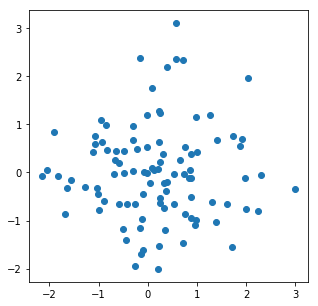

In [10]:
n_samples = 100
n_features = 2
X = np.random.randn(n_samples, n_features)
plt.figure(figsize=(5, 5))
plt.scatter(X[:,0], X[:,1])

In [11]:
X_normalized = preprocessing.normalize(X, norm='l2')
np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

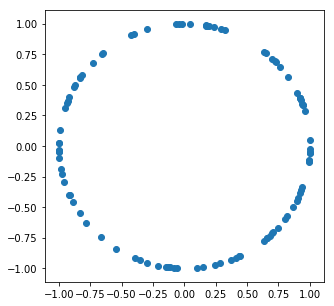

In [12]:
plt.figure(figsize=(5, 5))
plt.scatter(X_normalized[:,0], X_normalized[:,1])

### cosine similarity in sklearn

In [13]:
from scipy.spatial.distance import cosine
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

import numpy as np

In [14]:
x = np.array([2, 2]).reshape(1, -1)
y = np.array([2, 0]).reshape(1, -1)
1 - cosine(x, y), cosine_similarity(x, y)[0][0]

(0.7071067811865475, 0.7071067811865475)

In [15]:
x = np.array([2, 2]).reshape(1, -1)
y = np.array([-2, 0]).reshape(1, -1)
1 - cosine(x, y), cosine_similarity(x, y)[0][0]

(-0.7071067811865475, -0.7071067811865475)

### normalize v.s. cosine

In [19]:
n_samples = 8
n_features = 5
X = np.random.uniform(0, 2, size=(n_samples, n_features))
(X).round(2)

array([[1.45, 1.78, 0.61, 1.02, 0.87],
       [1.81, 1.22, 0.  , 1.91, 1.72],
       [0.06, 0.69, 0.72, 0.33, 0.03],
       [0.34, 0.77, 1.19, 0.4 , 0.69],
       [1.24, 1.43, 1.99, 0.46, 0.52],
       [0.72, 1.66, 0.66, 1.08, 0.64],
       [0.02, 0.19, 1.97, 1.22, 1.99],
       [1.53, 0.9 , 1.16, 1.38, 0.24]])

In [20]:
Y = np.random.uniform(-1, 3, size=(n_samples, n_features))
(Y).round(2)

array([[ 0.03,  2.61,  1.67,  1.56, -0.5 ],
       [ 2.2 ,  2.89,  2.77,  2.64, -0.9 ],
       [-0.61,  2.38,  0.55,  0.24,  0.71],
       [ 2.15,  0.11,  1.81,  1.76,  0.43],
       [-0.82,  1.11, -0.76,  1.92,  0.55],
       [ 1.22,  1.07,  2.  ,  0.5 ,  2.3 ],
       [ 1.57,  2.43,  2.54,  1.39,  0.84],
       [ 0.02,  1.13,  2.16, -0.55, -0.93]])

In [21]:
(cosine_similarity(X, Y)).round(2)

array([[ 0.72,  0.82,  0.63,  0.72,  0.4 ,  0.78,  0.9 ,  0.27],
       [ 0.45,  0.61,  0.39,  0.72,  0.52,  0.72,  0.7 , -0.14],
       [ 0.95,  0.88,  0.76,  0.6 ,  0.31,  0.67,  0.93,  0.76],
       [ 0.74,  0.76,  0.66,  0.71,  0.2 ,  0.93,  0.95,  0.59],
       [ 0.76,  0.87,  0.56,  0.79,  0.03,  0.85,  0.98,  0.69],
       [ 0.85,  0.85,  0.76,  0.66,  0.54,  0.75,  0.93,  0.35],
       [ 0.44,  0.46,  0.4 ,  0.65,  0.27,  0.88,  0.69,  0.24],
       [ 0.71,  0.93,  0.35,  0.94,  0.25,  0.72,  0.91,  0.38]])

In [22]:
np.allclose(np.dot(X, Y.T), cosine_similarity(X, Y))

False

In [23]:
X_normalized = preprocessing.normalize(X, norm='l2')
Y_normalized = preprocessing.normalize(Y, norm='l2')

np.linalg.norm(X_normalized, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1.])

In [24]:
cosine_similarity(X_normalized, Y_normalized).round(2)

array([[ 0.72,  0.82,  0.63,  0.72,  0.4 ,  0.78,  0.9 ,  0.27],
       [ 0.45,  0.61,  0.39,  0.72,  0.52,  0.72,  0.7 , -0.14],
       [ 0.95,  0.88,  0.76,  0.6 ,  0.31,  0.67,  0.93,  0.76],
       [ 0.74,  0.76,  0.66,  0.71,  0.2 ,  0.93,  0.95,  0.59],
       [ 0.76,  0.87,  0.56,  0.79,  0.03,  0.85,  0.98,  0.69],
       [ 0.85,  0.85,  0.76,  0.66,  0.54,  0.75,  0.93,  0.35],
       [ 0.44,  0.46,  0.4 ,  0.65,  0.27,  0.88,  0.69,  0.24],
       [ 0.71,  0.93,  0.35,  0.94,  0.25,  0.72,  0.91,  0.38]])

In [25]:
np.allclose(np.dot(X, Y.T), cosine_similarity(X, Y))

False

In [26]:
np.allclose(cosine_similarity(X, Y), cosine_similarity(X_normalized, Y_normalized))

True

In [27]:
np.allclose(np.dot(X_normalized, Y_normalized.T), cosine_similarity(X_normalized, Y_normalized))

True

http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
normalized vectors, in which case cosine_similarity is equivalent to linear_kernel, only slower.

In [28]:
np.allclose(linear_kernel(X_normalized, Y_normalized), cosine_similarity(X_normalized, Y_normalized))

True

So the euclidean distance will degrade to  $\sqrt{2 − 2x^T y}$, i.e., $\sqrt{2 - 2 \times cosinesimilarity}$

In [29]:
np.sqrt(sum((X_normalized[0] - Y_normalized[0])**2)), np.linalg.norm(X_normalized[0] - Y_normalized[0])

(0.7509789525594854, 0.7509789525594854)

In [30]:
np.sqrt(2 - 2 * np.dot(X_normalized[0], Y_normalized[0])), np.linalg.norm(X_normalized[0] - Y_normalized[0])

(0.7509789525594853, 0.7509789525594854)

In [31]:
np.sqrt(2 - 2 * cosine_similarity(X_normalized[0].reshape(1, -1), Y_normalized[0].reshape(1, -1)))

array([[0.75097895]])

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
metric : string or callable, default ‘minkowski’
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics.

- https://stackoverflow.com/questions/34144632/using-cosine-distance-with-scikit-learn-kneighborsclassifier
you can get the same ordering as the cosine distance by normalizing your data and then using the euclidean distance. So long as you use the uniform weights option, the results will be identical to having used a correct Cosine Distance.


- https://github.com/stanfordnlp/GloVe/blob/765074642a6544e47849bb85d8dc2e11e44c2922/eval/python/evaluate.py#L75-L76
```
#cosine similarity if input W has been normalized
dist = np.dot(W, pred_vec.T)
```